# Sprint18 データセットの作成

In [44]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import glob
import re

import matplotlib.pyplot as plt
%matplotlib inline

import cv2
from PIL import Image

# 【問題1】自作データセットでの分類の学習

# osを使用する場合

In [46]:
path = "/Users/hayashikentaro/diveintocode-ml/font"
flist = os.listdir(path)

In [47]:
# 隠しファイル名も取得される
flist

['dog10.jpg',
 'dog5.jpg',
 'dog4.jpg',
 'dog6.jpg',
 'dog7.jpg',
 '.DS_Store',
 'dog3.jpg',
 'dog2.jpg',
 'dog1.jpg',
 'cat1.jpg',
 'cat2.jpg',
 'cat3.jpg',
 'cat6.jpg',
 'cat10.jpg',
 'cat7.jpeg',
 'cat4.jpg',
 'cat5.jpg',
 'cat8.jpg',
 'cat9.jpeg',
 'dog9.jpg',
 'dog8.jpg']

In [48]:
# .DS_Storeのような隠しファイルを無視したい
flist_ignore = [name for name in os.listdir(path) if not name.startswith(".")]
flist_ignore

['dog10.jpg',
 'dog5.jpg',
 'dog4.jpg',
 'dog6.jpg',
 'dog7.jpg',
 'dog3.jpg',
 'dog2.jpg',
 'dog1.jpg',
 'cat1.jpg',
 'cat2.jpg',
 'cat3.jpg',
 'cat6.jpg',
 'cat10.jpg',
 'cat7.jpeg',
 'cat4.jpg',
 'cat5.jpg',
 'cat8.jpg',
 'cat9.jpeg',
 'dog9.jpg',
 'dog8.jpg']

# globを使用する場合

In [49]:
img_list = glob.glob(path + "/*" + ".jpg")

In [50]:
img_list

['/Users/hayashikentaro/diveintocode-ml/font/dog10.jpg',
 '/Users/hayashikentaro/diveintocode-ml/font/dog5.jpg',
 '/Users/hayashikentaro/diveintocode-ml/font/dog4.jpg',
 '/Users/hayashikentaro/diveintocode-ml/font/dog6.jpg',
 '/Users/hayashikentaro/diveintocode-ml/font/dog7.jpg',
 '/Users/hayashikentaro/diveintocode-ml/font/dog3.jpg',
 '/Users/hayashikentaro/diveintocode-ml/font/dog2.jpg',
 '/Users/hayashikentaro/diveintocode-ml/font/dog1.jpg',
 '/Users/hayashikentaro/diveintocode-ml/font/cat1.jpg',
 '/Users/hayashikentaro/diveintocode-ml/font/cat2.jpg',
 '/Users/hayashikentaro/diveintocode-ml/font/cat3.jpg',
 '/Users/hayashikentaro/diveintocode-ml/font/cat6.jpg',
 '/Users/hayashikentaro/diveintocode-ml/font/cat10.jpg',
 '/Users/hayashikentaro/diveintocode-ml/font/cat4.jpg',
 '/Users/hayashikentaro/diveintocode-ml/font/cat5.jpg',
 '/Users/hayashikentaro/diveintocode-ml/font/cat8.jpg',
 '/Users/hayashikentaro/diveintocode-ml/font/dog9.jpg',
 '/Users/hayashikentaro/diveintocode-ml/font/d

(224, 224, 3)


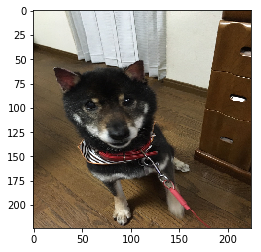

In [51]:
cat_img = Image.open(img_list[5])

#サイズを整える
cat_img = cat_img.resize((224 , 224))
cat_img = np.array(cat_img)

print(cat_img.shape)
plt.imshow(cat_img)
plt.show()

<class 'numpy.ndarray'>


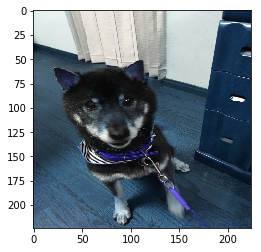

In [52]:
img = cv2.imread(img_list[5])

#cv2でリサイズ
img = cv2.resize(img , (224,224))

print(type(img))

plt.imshow(img)
plt.show()

# イメージのロード、配列化、リサイズ、データセット作成

In [53]:
#np.resizeは使用禁止

dog_img_array = np.empty((0 , 224 , 224 , 3))
cat_img_array = np.empty((0 , 224 , 224 , 3))

for img in img_list:
    
    #ファイル名に"dog"が含まれるimg
    if re.search("dog" , img):
        dog_img = Image.open(img)
        
        #サイズを整える
        dog_img = dog_img.resize((224 , 224))
        
        #PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img)
        
        #正規化
        dog_img = dog_img / 225.0
        
        #axisの追加
        dog_img = dog_img.reshape((1 , 224 , 224 , 3))
        
        dog_img_array = np.concatenate([dog_img_array , dog_img] , axis=0)
        
    # ファイル名に"cat"が含まれるimg
    if re.search("cat" , img):
        
        cat_img = Image.open(img)
        
        cat_img = cat_img.resize((224 , 224))
        
        cat_img = np.array(cat_img)
        
        cat_img = cat_img / 255.0
        
        cat_img = cat_img.reshape(1 , 224 , 224 , 3)
        
        cat_img_array = np.concatenate([cat_img_array , cat_img] , axis=0)

In [54]:
print("dog_image : {} cat_image : {}".format(dog_img_array.shape , cat_img_array.shape))

dog_image : (10, 224, 224, 3) cat_image : (8, 224, 224, 3)


# イメージの表示

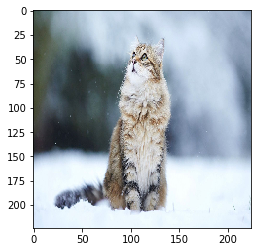

In [55]:
plt.imshow(cat_img_array[0])
plt.show()

画像の中心を切り出し

https://note.nkmk.me/python-pillow-image-crop-trimming/

In [56]:
def crop_center(pil_img, crop_width, crop_height):
    
    img_width, img_height = pil_img.size
    
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))

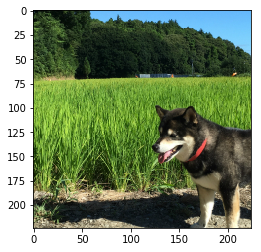

In [57]:
img = Image.open(img_list[1])

img_new = crop_center(img , 224 , 224)

plt.imshow(img_new)
plt.show()

# oprnCVの色形式

In [58]:
import cv2

# グレースケール

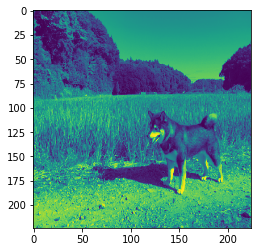

In [59]:
#第二引数を０にするとグレースケールで読み込める
img = cv2.imread(img_list[1] , 0)

#cv2でリサイズ
img = cv2.resize(img , (224,224))

plt.imshow(img)
plt.show()

# BGRとRGB

なぜ彼らはOpenCVでBGRカラースペースを選択したのですか？

OpenCVの初期の開発者がBGRカラー形式を選択した理由は、
当時のBGRカラー形式がカメラメーカーとソフトウェアプロバイダーの間で人気があったためです。
たとえば、Windowsでは、COLORREFを使用して色の値を指定する場合、BGR形式0x00bbggrrを使用します。

BGRは歴史的な理由から選択されたものであり、今ではBGRと共存しなければなりません。
言い換えれば、BGRはOpenCVの馬のお尻です。

https://www.learnopencv.com/why-does-opencv-use-bgr-color-format/

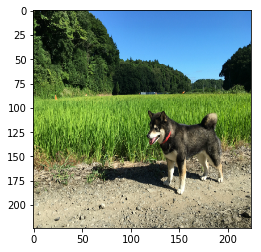

In [60]:
img = cv2.imread(img_list[1])
img = cv2.resize(img , (224 , 224))

img_rgb = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)

#RGB

plt.imshow(img_rgb)
plt.show()

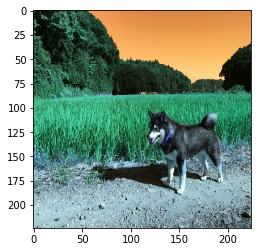

In [61]:
#BGR

plt.imshow(img)
plt.show()

In [62]:
X = np.concatenate([dog_img_array , cat_img_array] , axis=0)

In [63]:
y_list = []

for img in img_list:
    if re.search("dog" , img):
        label = 0
        y_list.append(label)
    if re.search("cat" , img):
        label = 1
        y_list.append(label)

In [64]:
y = y_list
print(y)

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]


In [465]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Conv2D , MaxPooling2D , Flatten , Dropout
from keras.optimizers import Adam

In [466]:
from keras import layers
from keras import models
from keras import backend as K

In [469]:
K.clear_session()

input_data = tf.keras.layers.Input(shape=(224 , 224 , 3))
con_1 = tf.keras.layers.Conv2D(3 , kernel_size=(2,2) , activation=tf.nn.relu)(input_data)
max_p1 = tf.keras.layers.MaxPooling2D((3,3) , strides=(1,1))(con_1)
con_2 = tf.keras.layers.Conv2D(3 , kernel_size=(2,2) , activation=tf.nn.relu)(max_p1)
max_p2 = tf.keras.layers.MaxPooling2D((3,3) , strides=(1,1))(con_2)
fla = tf.keras.layers.Flatten()(max_p2)

x = tf.keras.layers.Dense(512 , activation = tf.nn.relu)(fla)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(256 , activation = tf.nn.relu)(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(128 , activation = tf.nn.relu)(x)
output = tf.keras.layers.Dense(1 , activation = tf.nn.sigmoid)(x)
model = tf.keras.Model(inputs = input_data , outputs = output)                          


In [470]:
model.summary()
model.compile(loss="binary_crossentropy",
             optimizer = tf.train.AdamOptimizer(learning_rate=1e-1),
             metrics=["accuracy"])

histoty = model.fit(X , y , 
                   batch_size = 32 , 
                   epochs = 10 , 
                   verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 223, 223, 3)       39        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 221, 221, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 3)       39        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 218, 218, 3)       0         
_________________________________________________________________
flatten (Flatten)            (None, 142572)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               72997376  
__________

In [471]:
from sklearn.metrics import precision_score
y_pred_proba = model.predict(X)[: , 0]

y_pred = np.where(y_pred_proba > 0.5 , 1 , 0)
print("y_pred_proba" , y_pred_proba)
print("y_pred" , y_pred)
print("精度" , precision_score(y , y_pred))

y_pred_proba [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_pred [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
精度 0.0


/Users/hayashikentaro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


# 【問題2】分類データセットに対するデータ拡張

In [472]:
for img in img_list:
    if re.search("dog" , img):
        dog = Image.open(img)
    if re.search("cat" , img):
        cat = Image.open(img)

In [71]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img, img_to_array

Using TensorFlow backend.


In [474]:
datagen = ImageDataGenerator(
           rotation_range=0,
           width_shift_range=0,
           height_shift_range=0,
           shear_range=0,
           zoom_range=0,
           horizontal_flip=False,
           vertical_flip=False)

In [41]:
#入力ディレクトリを作成
input_dir = "cat.font"
files = glob.glob(input_dir + '/*.jpg')
# 出力ディレクトリを作成
output_dir = "image_out"
if os.path.isdir(output_dir) == False:
    os.mkdir(output_dir)

In [42]:
for i, file in enumerate(files):
 
    img = load_img(file)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
 
    # ImageDataGeneratorの生成
    datagen = ImageDataGenerator(
           rotation_range=45, #指定範囲でランダムに回転
           width_shift_range=0.1,#ランダムに水平シフト
           height_shift_range=0.1,#ランダムに垂直シフト
           shear_range=0.2,#シアー変換
           zoom_range=0.2,#ランダムにズーム
           channel_shift_range=5,#チャンネルをランダムに移動
           brightness_range=[0.3, 1.0],#画像の明るさ調整
           horizontal_flip=False,
           vertical_flip=False)
 
    # n_iter個の画像を生成します
    n_iter = 1
    g = datagen.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix='cat', save_format='jpg')
    for i in range(n_iter):
        batch = g.next()

In [657]:
path = "image_out"
flist = os.listdir(path)
len(flist)

491

In [658]:
flist_ignore = [name for name in os.listdir(path) if not name.startswith(".")]
len(flist_ignore)

491

In [659]:
img_list = glob.glob(path + '/*' + ".jpg")

In [660]:
dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img = Image.open(img)
        
        # サイズを揃える
        dog_img = dog_img.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img)
        
        # 正規化
        dog_img = dog_img / 255.0
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img = Image.open(img)
        
        cat_img = cat_img.resize((224, 224))
        
        cat_img = np.array(cat_img)
        
        cat_img = cat_img / 255.0
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)

In [661]:
print('dog_image:{}  cat_image:{}'.format(dog_img_array.shape, cat_img_array.shape))

dog_image:(247, 224, 224, 3)  cat_image:(244, 224, 224, 3)


In [703]:
X = np.concatenate([dog_img_array , cat_img_array] , axis=0)

In [704]:
y_list = []

for img in img_list:
    if re.search("dog" , img):
        label = 0
        y_list.append(label)
    if re.search("cat" , img):
        label = 1
        y_list.append(label)

In [705]:
y = y_list

In [706]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(
               X , y , test_size = 0.2)

In [707]:
K.clear_session()

input_data = tf.keras.layers.Input(shape=(224 , 224 , 3))
con_1 = tf.keras.layers.Conv2D(3 , kernel_size=(2,2) , activation=tf.nn.relu)(input_data)
max_p1 = tf.keras.layers.MaxPooling2D((3,3) , strides=(1,1))(con_1)
con_2 = tf.keras.layers.Conv2D(3 , kernel_size=(2,2) , activation=tf.nn.relu)(max_p1)
max_p2 = tf.keras.layers.MaxPooling2D((3,3) , strides=(1,1))(con_2)
fla = tf.keras.layers.Flatten()(max_p2)

x = tf.keras.layers.Dense(1024 , activation = tf.nn.relu)(fla)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(512 , activation = tf.nn.relu)(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(256 , activation = tf.nn.relu)(x)
output = tf.keras.layers.Dense(1 , activation = tf.nn.sigmoid)(x)
model = tf.keras.Model(inputs = input_data , outputs = output)      

In [708]:
model.summary()
model.compile(loss="binary_crossentropy",
             optimizer = tf.train.AdamOptimizer(learning_rate=1e-4),
             metrics=["accuracy"])

histoty = model.fit(X_train , y_train , 
                   batch_size = 32 , 
                   epochs = 20 , 
                   verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 223, 223, 3)       39        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 221, 221, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 3)       39        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 218, 218, 3)       0         
_________________________________________________________________
flatten (Flatten)            (None, 142572)            0         
_________________________________________________________________
dense (Dense)                (None, 1024)              145994752 
__________

KeyboardInterrupt: 

# テスト

In [694]:
pa = "test"
fl = os.listdir(pa)
len(fl)

9

In [695]:
flist_ignore = [name for name in os.listdir(pa) if not name.startswith(".")]
len(flist_ignore)
i_list = glob.glob(pa + '/*' + ".jpg")

In [696]:
cat_img = Image.open(i_list[1])
cat_img = cat_img.resize((224,224))
cat_img = np.array(cat_img)

print(cat_img.shape)

(224, 224, 4)


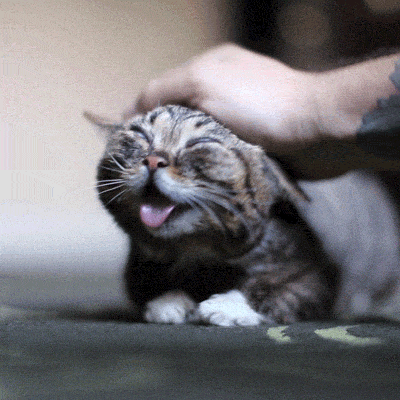

In [697]:
cat_img = Image.open(i_list[1])
cat_img

In [698]:
test_array = np.empty((0,224,224,3))

for img in i_list:
    _img = Image.open(img)
    _img = _img.resize((224 , 224))
    _img = np.array(_img)
    
    if _img.shape == (224,224,4):
        _img = _img[: , : , :3]
    _img = _img / 255.0
        
    _img = _img.reshape((1,224,224,3))
        
    test_array = np.concatenate([test_array, _img], axis = 0)

In [699]:
test_array.shape
test = test_array

In [700]:
y_l = []

for img in i_list:
    if re.search("dog" , img):
        label = 0
        y_l.append(label)
    if re.search("cat" , img):
        label = 1
        y_l.append(label)

In [701]:
y = y_l
y

[1, 1, 1, 1, 0, 0, 0]

In [702]:
y_pred_proba = model.predict(test)[: , 0]

y_pred = np.where(y_pred_proba > 0.5 , 1 , 0)
print("y_pred_proba" , y_pred_proba)
print("y_pred" , y_pred)
print("精度" , precision_score(y , y_pred))

y_pred_proba [0.39322352 0.5463362  0.5013043  0.50162685 0.48134166 0.5213467
 0.51256657]
y_pred [0 1 1 1 0 1 1]
精度 0.6


# 【問題3】物体検出データセットの用意

In [1]:
%matplotlib inline
from urllib.request import urlopen
import os

import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
def download_image(url):
    data = open(url,"rb").read()
    data = np.frombuffer(data, np.uint8)
    image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [3]:
BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)


def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(w), int(y_min), int(h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.35,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img


def visualize(annotations, category_id_to_name):
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(10,40))
    plt.imshow(img)
    return img

In [4]:
def get_aug(aug, min_area=0., min_visibility=0.):
    return Compose(aug, bbox_params=BboxParams(format='coco', min_area=min_area, 
                                               min_visibility=min_visibility, label_fields=['category_id']))

In [10]:
image = download_image('/Users/hayashikentaro/diveintocode-ml/dog.font/dog1.jpg')
image = np.array(image)

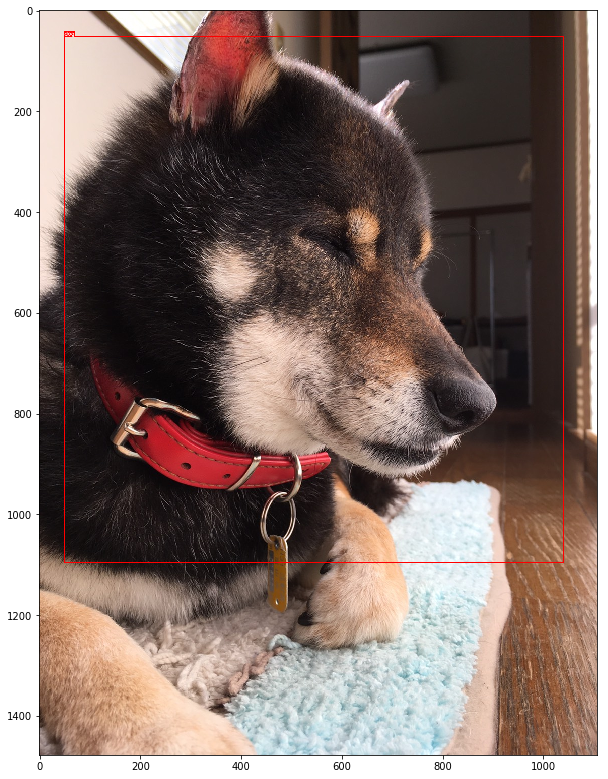

In [14]:
image = download_image('/Users/hayashikentaro/diveintocode-ml/dog.font/dog1.jpg')
image = np.array(image)


annotations = {'image': image, 'bboxes': [[50,52,1041,1096]], 'category_id': [18]}
category_id_to_name = {17: 'cat', 18: 'dog'}
img = visualize(annotations, category_id_to_name)

pillow = Image.fromarray(np.uint8(img))
pillow.save("/Users/hayashikentaro/diveintocode-ml/dog.font/dog1.jpg")

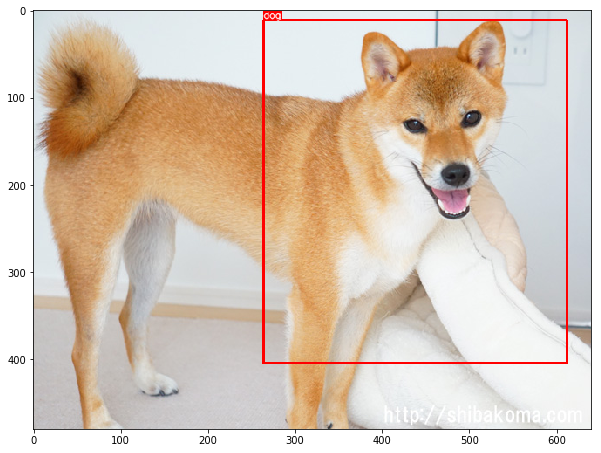

In [15]:
image = download_image('/Users/hayashikentaro/diveintocode-ml/dog.font/dog2.jpg')
image = np.array(image)


annotations = {'image': image, 'bboxes': [[264,11,612,404]], 'category_id': [18]}
category_id_to_name = {17: 'cat', 18: 'dog'}
img = visualize(annotations, category_id_to_name)

pillow = Image.fromarray(np.uint8(img))
pillow.save("/Users/hayashikentaro/diveintocode-ml/dog.font/dog2.jpg")

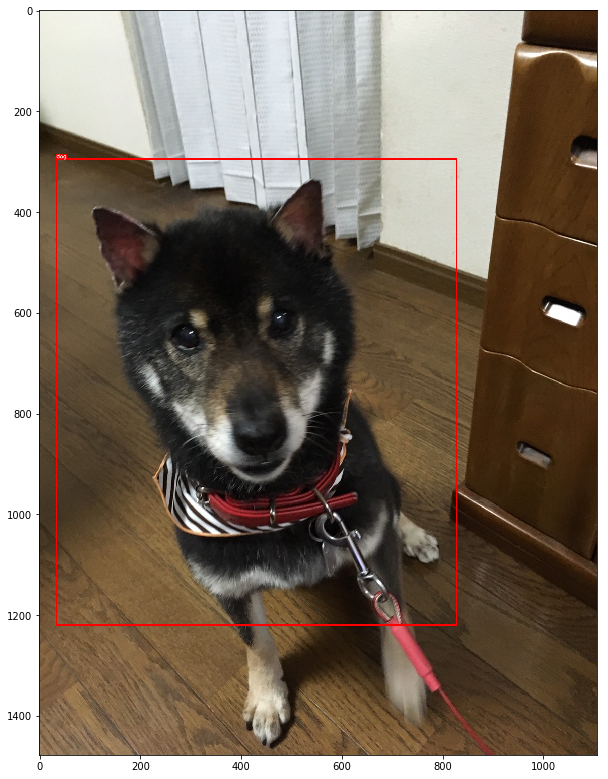

In [16]:
image = download_image('/Users/hayashikentaro/diveintocode-ml/dog.font/dog3.jpg')
image = np.array(image)


annotations = {'image': image, 'bboxes': [[34,295,829,1220]], 'category_id': [18]}
category_id_to_name = {17: 'cat', 18: 'dog'}
img = visualize(annotations, category_id_to_name)

pillow = Image.fromarray(np.uint8(img))
pillow.save("/Users/hayashikentaro/diveintocode-ml/dog.font/dog3.jpg")

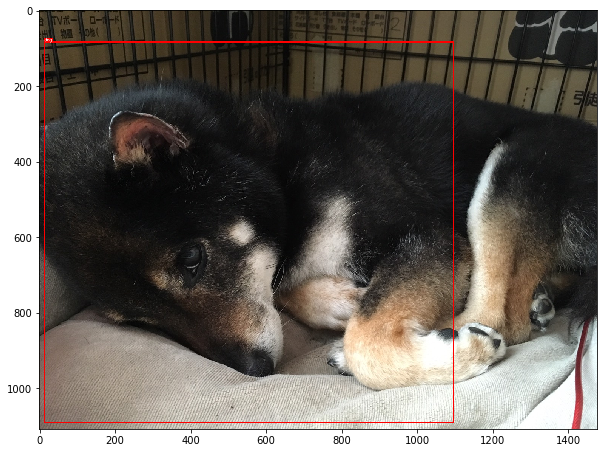

In [17]:
image = download_image('/Users/hayashikentaro/diveintocode-ml/dog.font/dog4.jpg')
image = np.array(image)


annotations = {'image': image, 'bboxes': [[14,84,1098,1091]], 'category_id': [18]}
category_id_to_name = {17: 'cat', 18: 'dog'}
img = visualize(annotations, category_id_to_name)

pillow = Image.fromarray(np.uint8(img))
pillow.save("/Users/hayashikentaro/diveintocode-ml/dog.font/dog4.jpg")

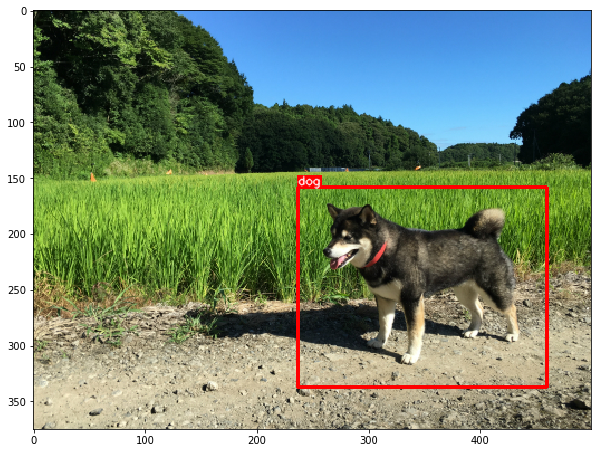

In [18]:
image = download_image('/Users/hayashikentaro/diveintocode-ml/dog.font/dog5.jpg')
image = np.array(image)


annotations = {'image': image, 'bboxes': [[237,158,460,337]], 'category_id': [18]}
category_id_to_name = {17: 'cat', 18: 'dog'}
img = visualize(annotations, category_id_to_name)

pillow = Image.fromarray(np.uint8(img))
pillow.save("/Users/hayashikentaro/diveintocode-ml/dog.font/dog5.jpg")

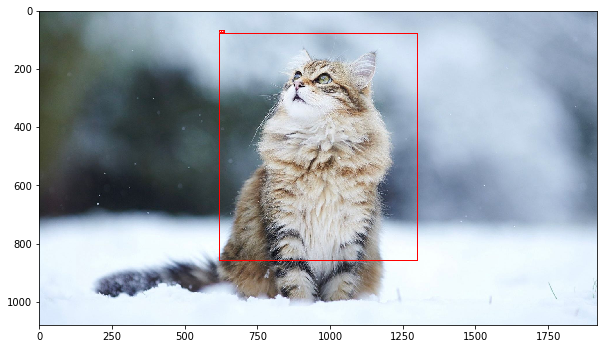

In [19]:
image = download_image('/Users/hayashikentaro/diveintocode-ml/cat.font/cat1.jpg')
image = np.array(image)


annotations = {'image': image, 'bboxes': [[621,77,1302,857]], 'category_id': [17]}
category_id_to_name = {17: 'cat', 18: 'dog'}
img = visualize(annotations, category_id_to_name)

pillow = Image.fromarray(np.uint8(img))
pillow.save("/Users/hayashikentaro/diveintocode-ml/cat.font/cat1.jpg")

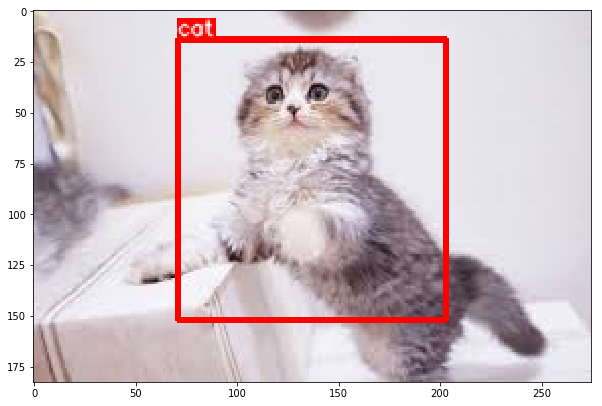

In [20]:
image = download_image('/Users/hayashikentaro/diveintocode-ml/cat.font/cat2.jpg')
image = np.array(image)


annotations = {'image': image, 'bboxes': [[71,14,203,152]], 'category_id': [17]}
category_id_to_name = {17: 'cat', 18: 'dog'}
img = visualize(annotations, category_id_to_name)

pillow = Image.fromarray(np.uint8(img))
pillow.save("/Users/hayashikentaro/diveintocode-ml/cat.font/cat2.jpg")

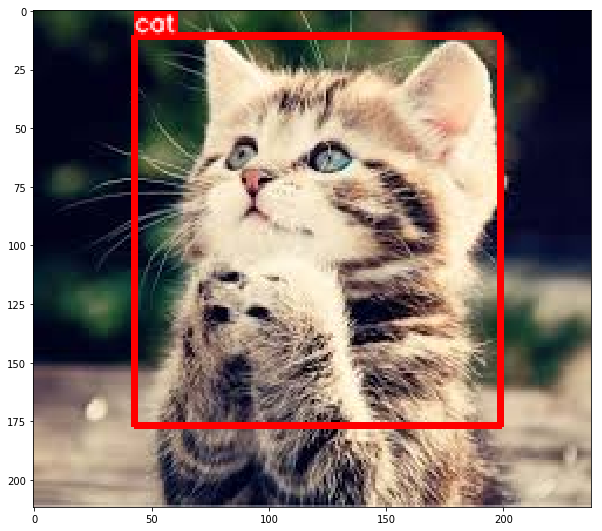

In [21]:
image = download_image('/Users/hayashikentaro/diveintocode-ml/cat.font/cat3.jpg')
image = np.array(image)


annotations = {'image': image, 'bboxes': [[43,11,199,177]], 'category_id': [17]}
category_id_to_name = {17: 'cat', 18: 'dog'}
img = visualize(annotations, category_id_to_name)

pillow = Image.fromarray(np.uint8(img))
pillow.save("/Users/hayashikentaro/diveintocode-ml/cat.font/cat3.jpg")

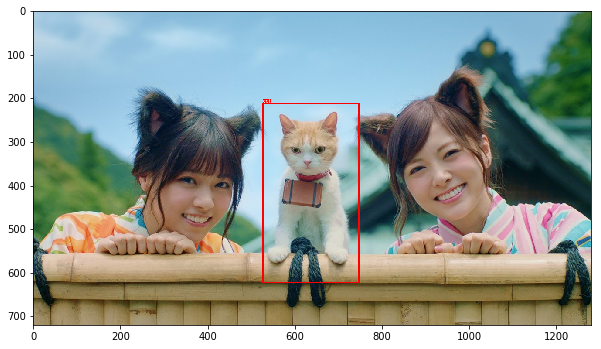

In [25]:
image = download_image('/Users/hayashikentaro/diveintocode-ml/cat.font/cat8.jpg')
image = np.array(image)


annotations = {'image': image, 'bboxes': [[527,211,747,622]], 'category_id': [17]}
category_id_to_name = {17: 'cat', 18: 'dog'}
img = visualize(annotations, category_id_to_name)

pillow = Image.fromarray(np.uint8(img))
pillow.save("/Users/hayashikentaro/diveintocode-ml/cat.font/cat8.jpg")

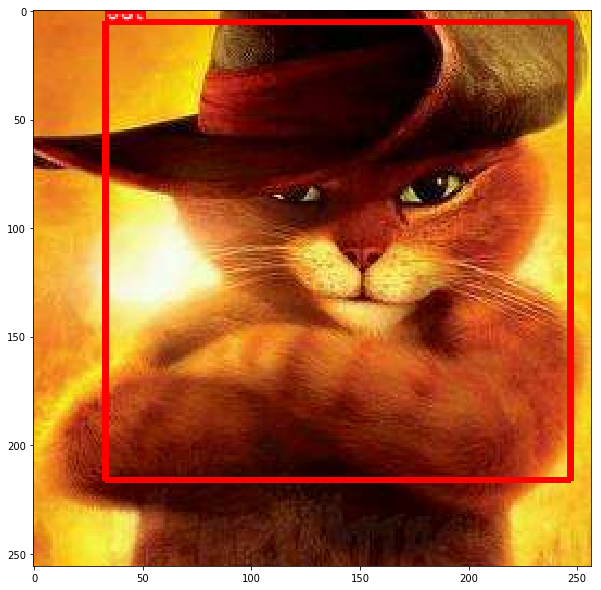

In [26]:
image = download_image('/Users/hayashikentaro/diveintocode-ml/cat.font/cat10.jpg')
image = np.array(image)


annotations = {'image': image, 'bboxes': [[33,5,247,216]], 'category_id': [17]}
category_id_to_name = {17: 'cat', 18: 'dog'}
img = visualize(annotations, category_id_to_name)

pillow = Image.fromarray(np.uint8(img))
pillow.save("/Users/hayashikentaro/diveintocode-ml/cat.font/cat10.jpg")

In [38]:
with open("/Users/hayashikentaro/diveintocode-ml/dog.font/annotation.txt") as f:
  s = f.read()
  print(s)

/Users/hayashikentaro/diveintocode-ml/dog.font/dog1.jpg 50,52,1041,1096,0
/Users/hayashikentaro/diveintocode-ml/dog.font/dog2.jpg 264,11,612,404,0
/Users/hayashikentaro/diveintocode-ml/dog.font/dog3.jpg 34,295,829,1220,0
/Users/hayashikentaro/diveintocode-ml/dog.font/dog4.jpg 14,84,1098,1091,0
/Users/hayashikentaro/diveintocode-ml/dog.font/dog5.jpg 237,158,460,337,0
/Users/hayashikentaro/diveintocode-ml/cat.font/cat1.jpg 621,77,1302,857,1
/Users/hayashikentaro/diveintocode-ml/cat.font/cat2.jpg 71,14,203,152,1
/Users/hayashikentaro/diveintocode-ml/cat.font/cat3.jpg 43,11,199,177,1
/Users/hayashikentaro/diveintocode-ml/cat.font/cat8.jpg 527,211,747,622,1
/Users/hayashikentaro/diveintocode-ml/cat.font/cat10.jpg 33,5,247,216,1


# 【問題4】物体検出データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。前述のalbumentationsはバウンディングボックスを合わせての加工が可能です。詳細はREADME.mdを確認してください。

物体検出の学習を行なうかどうかは任意とします。

In [79]:
#入力ディレクトリを作成
input_dir = "/Users/hayashikentaro/diveintocode-ml/cat.font"
files = glob.glob(input_dir + '/*.jpg')
# 出力ディレクトリを作成
output_dir = "/Users/hayashikentaro/diveintocode-ml/image_out"
if os.path.isdir(output_dir) == False:
    os.mkdir(output_dir)

In [80]:
for i, file in enumerate(files):
 
    img = load_img(file)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
 
    # ImageDataGeneratorの生成
    datagen = ImageDataGenerator(
           rotation_range=45, #指定範囲でランダムに回転
           width_shift_range=0.1,#ランダムに水平シフト
           height_shift_range=0.1,#ランダムに垂直シフト
           shear_range=0.2,#シアー変換
           zoom_range=0.2,#ランダムにズーム
           channel_shift_range=5,#チャンネルをランダムに移動
           brightness_range=[0.3, 1.0],#画像の明るさ調整
           horizontal_flip=False,
           vertical_flip=False)
 
    # n_iter個の画像を生成します
    n_iter = 5
    g = datagen.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix='cat', save_format='jpg')
    for i in range(n_iter):
        batch = g.next()

In [81]:
#入力ディレクトリを作成
input_dir = "/Users/hayashikentaro/diveintocode-ml/dog.font"
files = glob.glob(input_dir + '/*.jpg')
# 出力ディレクトリを作成
output_dir = "/Users/hayashikentaro/diveintocode-ml/image_out"
if os.path.isdir(output_dir) == False:
    os.mkdir(output_dir)

In [82]:
for i, file in enumerate(files):
 
    img = load_img(file)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
 
    # ImageDataGeneratorの生成
    datagen = ImageDataGenerator(
           rotation_range=45, #指定範囲でランダムに回転
           width_shift_range=0.1,#ランダムに水平シフト
           height_shift_range=0.1,#ランダムに垂直シフト
           shear_range=0.2,#シアー変換
           zoom_range=0.2,#ランダムにズーム
           channel_shift_range=5,#チャンネルをランダムに移動
           brightness_range=[0.3, 1.0],#画像の明るさ調整
           horizontal_flip=False,
           vertical_flip=False)
 
    # n_iter個の画像を生成します
    n_iter = 5
    g = datagen.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix='dog', save_format='jpg')
    for i in range(n_iter):
        batch = g.next()

https://github.com/albumentations-team/albumentations/blob/master/notebooks/example_bboxes.ipynb